In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

In [41]:
G = nx.DiGraph()
with open("gr_qc_coauthorships.txt", "r") as file:
    lines = file.read().splitlines()
    for line in lines:
        v1, v2 = line.split(' ')
        G.add_nodes_from([v1, v2])
        G.add_edge(v1, v2)
    


# A.

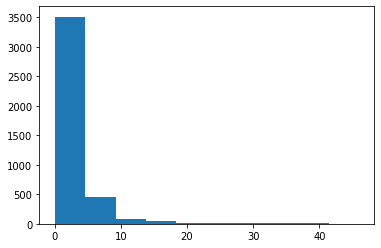

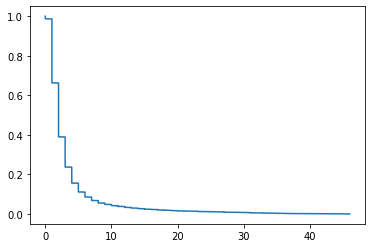

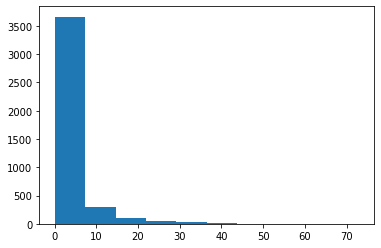

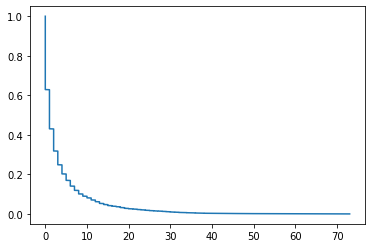

In [45]:
def plot_in_degree_dist(G):
    in_degrees = np.array([G.in_degree(n) for n in G.nodes()])
    plt.hist(in_degrees)
    plt.show()

    x = np.concatenate([np.sort(list(in_degrees))])
    plt.plot(x, np.linspace(1, 0, len(x)))
    plt.show()

def plot_out_degree_dist(G):
    out_degrees = np.array([G.out_degree(n) for n in G.nodes()])
    plt.hist(out_degrees)
    plt.show()

    # cdf = out_degrees.cumsum() / out_degrees.sum()
    # ccdf = 1 - cdf
    # plt.plot(range(len(out_degrees)), ccdf)
    # plt.show()
    x = np.concatenate([np.sort(list(out_degrees))])
    plt.plot(x, np.linspace(1, 0, len(x)))
    plt.show()

plot_in_degree_dist(G)
plot_out_degree_dist(G)

In [43]:
undirected_G = G.to_undirected()
avg_cluster = nx.average_clustering(undirected_G)
overall_cluster = nx.transitivity(undirected_G)

max_diameter = nx.diameter(undirected_G)
avg_diameter = nx.average_shortest_path_length(undirected_G)

print("avg clustering coeff: {}\n overall clustering coeff: {}".format(avg_cluster, overall_cluster))
print("avg diameter: {}\n max diameter: {}".format(avg_diameter, max_diameter))

avg clustering coeff: 0.5568782161697919
 overall clustering coeff: 0.6288944756689877
avg diameter: 6.049380016182999
 max diameter: 17


# B

In [44]:
num_triangles = np.sum(list(nx.triangles(undirected_G).values()))/3
print("Num triangles: {}".format(num_triangles))
n = G.number_of_nodes()
p = (6 * num_triangles / (n * (n-1) * (n-2))) ** (1/3)
print("p = {}".format(p))


Num triangles: 47779.0
p = 0.015861688593415416


# C

We expect the erdos graph to take on a binomial distribution, but this graph takes on a heavy-tailed distribution more, so it is not a great model. We do not need the histogram to conclude this, as the random graph is an evenly distributed sample of edges between nodes, whereas in the real world they are note quite random and some nodes have many more connections than others based on other properties.